In [1]:
import numpy as np
import pandas as pd


In [2]:
bird_data = pd.read_csv('dataset.csv')
bird_data.head()


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


We can see id is redundant here ans python indexes automatically so we set id column as index.

In [3]:
bird_data = bird_data.set_index('id')

In [4]:
bird_data.info()


<class 'pandas.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    419 non-null    float64
 1   humw    419 non-null    float64
 2   ulnal   417 non-null    float64
 3   ulnaw   418 non-null    float64
 4   feml    418 non-null    float64
 5   femw    419 non-null    float64
 6   tibl    418 non-null    float64
 7   tibw    419 non-null    float64
 8   tarl    419 non-null    float64
 9   tarw    419 non-null    float64
 10  type    420 non-null    str    
dtypes: float64(10), str(1)
memory usage: 36.2 KB


In [5]:
bird_data.isnull().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

To drop null values, we can drop the entire row by dropna function. If large number of values would have been missing then we can also fill the data via several methods.

In [6]:
bird_data.dropna (how='any', inplace=True)
bird_data.isnull().sum()

huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

We can find unique values via .nunique() which retruns number of unique values in each column. To get number of classes we can use .unique() on the tyoe column

In [7]:
bird_data['type'].unique()

<StringArray>
['SW', 'W', 'T', 'R', 'P', 'SO']
Length: 6, dtype: str

The classes above are in string,  but we need digits as model dont understand the word. Or any feature having a non numerical value needs to be changed into numbers and that is done by label encoder.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bird_data['type'] = le.fit_transform(bird_data['type'])
bird_data['type'].unique()

array([3, 5, 4, 1, 0, 2])

In [10]:
x = bird_data.drop(['type'], axis = 1 )
y = bird_data['type']

print(x.shape)


(413, 10)


Now we use one hot encoding on y meaning for example if in row 1 type 3 was present then an array will rep 0,0,0,1,0,0 to tell that type 3 was present for that row. We do this to make a loss function later on .

In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes = 6
y = to_categorical(y, num_classes)
y




In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape)


(330, 10)


Why fit() is used ONLY on Training Data
1. To Prevent Data Leakage

Test data must be completely unseen

Using fit() on test data leaks information

Leads to unrealistic accuracy

2. To Maintain Consistent Scaling

Model learns weights based on training scale

Test data must use SAME scale

Different scaling = wrong predictions

While building an ANN model, each layer contains a set of neurons. The Sequential model is used because we are creating the network layer by layer in a linear manner. Dense layers are used to make the network fully connected, where every neuron in one layer is connected to every neuron in the next layer.

An ANN generally has three main parts: input layer, hidden layer(s), and output layer. The input layer receives the input data. The input dimension is equal to the number of features in the dataset, which is 10 in this case. The number of units represents the number of neurons in that layer and can be chosen based on the problem.

The kernel initializer is used to initialize the weights of the network. It helps start the training process by giving initial values to the weights. The 'uniform' initializer is simple and commonly used, although other initializers like He and Glorot are often better for deep networks.

Activation functions are used to introduce non-linearity into the network. ReLU (Rectified Linear Unit) is the most commonly used activation function in hidden layers because it helps the model learn complex patterns and reduces vanishing gradient problems.

The model can have two or more hidden layers. Generally, the number of units may increase in deeper layers because early layers learn simple features, while later layers learn more complex and abstract features.

In the output layer, the number of units is always equal to the number of classes. The activation function is either sigmoid or softmax because they produce probability values. Sigmoid is used for binary classification, and softmax is used for multi-class classification. These functions do not directly give a class label; instead, they output the probability of the input belonging to each class.

The input dimension is specified only in the first (input) layer. After that, Keras automatically infers the dimensions for all subsequent layers.


While fitting (training) the ANN model, we must specify the optimizer, loss function, and metrics. At the output, the model’s prediction is compared with the actual target values to calculate the loss, which represents how far the predicted output is from the true output. For multi-class classification, categorical cross-entropy is commonly used as the loss function.

After calculating the loss, the model updates the weights associated with each neuron to reduce this loss. This is done using gradients computed through backpropagation and the previous weights. The optimizer is responsible for calculating the new weights using these gradients. Common optimizers include Gradient Descent and Adam, where Adam is widely used because it adapts the learning rate automatically.

The metrics parameter specifies how the model’s performance is evaluated, such as accuracy, which shows how many predictions are correct.

The model is then trained using the training data by calling the fit function. During training, the batch size determines how many samples are processed before updating the weights, and epochs represent how many times the entire training dataset is passed through the network. More epochs allow the model to learn better patterns, but too many epochs can cause overfitting.

In [40]:
from keras.models  import Sequential
from keras.layers  import Dense

In [80]:
classifier = Sequential()

classifier.add(Dense (units = 8, kernel_initializer= 'uniform', activation = 'relu', input_dim =10))
classifier.add(Dense (units = 16, kernel_initializer= 'uniform', activation = 'relu'))
classifier.add(Dense (units = 32, kernel_initializer= 'uniform', activation = 'relu'))
classifier.add(Dense (units = 6, kernel_initializer= 'uniform', activation = 'softmax'))



In [81]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 16, epochs = 400)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2958 - loss: 1.7894
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2830 - loss: 1.7752
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3638 - loss: 1.7471
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5040 - loss: 1.6709
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4601 - loss: 1.5543
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4911 - loss: 1.4828
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4675 - loss: 1.4673
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 1.3247
Epoch 9/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4937 - loss: 1.3132
Epoch 10/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4921 - loss: 1.3116
Epoch 11/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 1.2395  
Epoch 12/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [82]:
score,acc = classifier.evaluate(x_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

score , acc = classifier.evaluate(x_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9138 - loss: 0.2468
Train score: 0.23546969890594482
Train accuracy: 0.918181836605072
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8212 - loss: 2.4779  
Test score: 1.3914625644683838
Test accuracy: 0.8072289228439331


In [85]:
pred = classifier.predict(x_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print ( y_pred)
print ( y_true)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[3 3 0 3 5 2 1 3 3 3 3 2 5 3 2 2 3 3 2 5 3 2 0 5 2 0 4 1 0 5 1 2 3 2 3 3 3
 2 2 2 0 2 3 1 2 2 5 3 0 2 4 1 2 2 5 2 5 0 1 0 1 1 3 5 1 3 3 2 0 4 5 3 1 3
 2 1 5 5 2 3 1 2 5]
[3 3 2 1 5 2 1 3 3 3 3 2 5 3 2 2 3 3 2 5 3 2 0 5 2 1 4 2 1 5 1 2 3 2 3 3 3
 2 2 2 1 2 3 1 2 2 3 5 3 2 4 5 2 2 3 2 5 2 5 0 1 1 5 0 1 3 3 2 0 4 5 3 5 3
 2 1 5 5 2 3 1 2 5]


In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['P', 'R', 'SO', 'SW', 'T', 'W']
print(cm)

[[ 3  0  0  0  0  1]
 [ 3  8  0  1  0  0]
 [ 2  1 23  0  0  0]
 [ 1  0  0 20  0  2]
 [ 0  0  0  0  3  0]
 [ 0  3  0  2  0 10]]


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(50.722222222222214, 0.5, 'True')

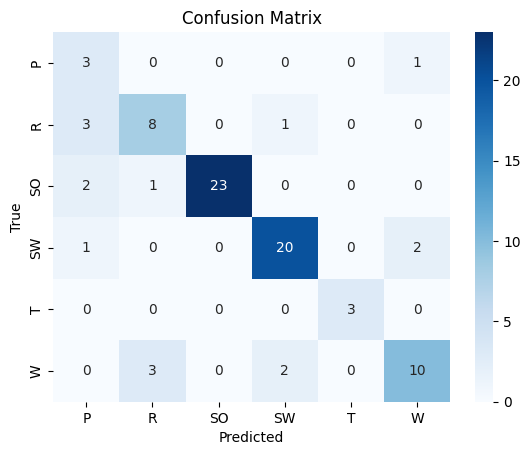

In [88]:
plt.title('Confusion Matrix')
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')